# 1. Import The Libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


print("="*60)
print("K-Means Clustering")
print("="*60)

K-Means Clustering


# 2.Load The Data

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Keep Numeric Features

In [4]:
df_features = df.drop(columns=["species"])

# 4. Scaling The Features

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)


# 5. Testing Different Values of K 

In [6]:
print("\n" + "="*60)
print("MODEL KMeans")
print("="*60)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nTesting different values of K...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    print(f"K={k}: SSE={kmeans.inertia_:.2f}, Silhouette Score={silhouette_scores[-1]:.4f}")



MODEL KMeans

Testing different values of K...
K=2: SSE=223.73, Silhouette Score=0.5802
K=3: SSE=140.97, Silhouette Score=0.4590
K=4: SSE=114.62, Silhouette Score=0.3853
K=5: SSE=91.30, Silhouette Score=0.3473
K=6: SSE=81.76, Silhouette Score=0.3407
K=7: SSE=71.32, Silhouette Score=0.3288
K=8: SSE=62.65, Silhouette Score=0.3404
K=9: SSE=55.26, Silhouette Score=0.3427
K=10: SSE=50.62, Silhouette Score=0.3404


# 6. Elbow Method (K-Means)

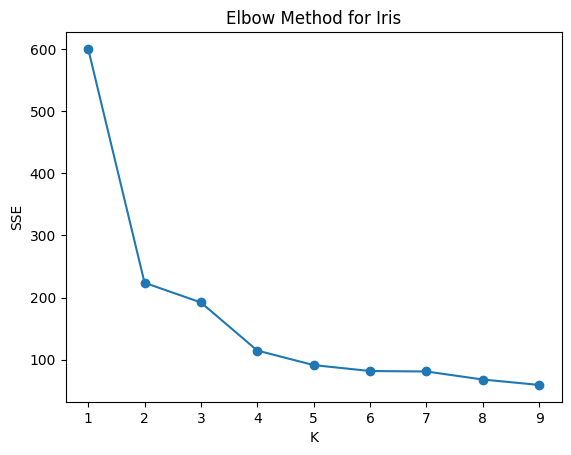

 Optimal K selected: 3


In [7]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Method for Iris")
plt.show()

sse_diff = np.diff(sse) 
sse_diff2 = np.diff(sse_diff)  
k_elbow = k_range[1:-1][np.argmin(sse_diff2)] 

print(f" Optimal K selected: {k_elbow}")


# 7. Build the Model ( K-Means )

In [8]:
kmeans = KMeans(n_clusters=k_elbow, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# 8. Evaluation (K-Means)

In [9]:
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

sil_kmeans = silhouette_score(df_scaled, df["cluster"])
print(f"KMeans Silhouette Score: {sil_kmeans:.3f}")



MODEL EVALUATION
KMeans Silhouette Score: 0.459


# 9. Visualization K-Means


VISUALIZATION


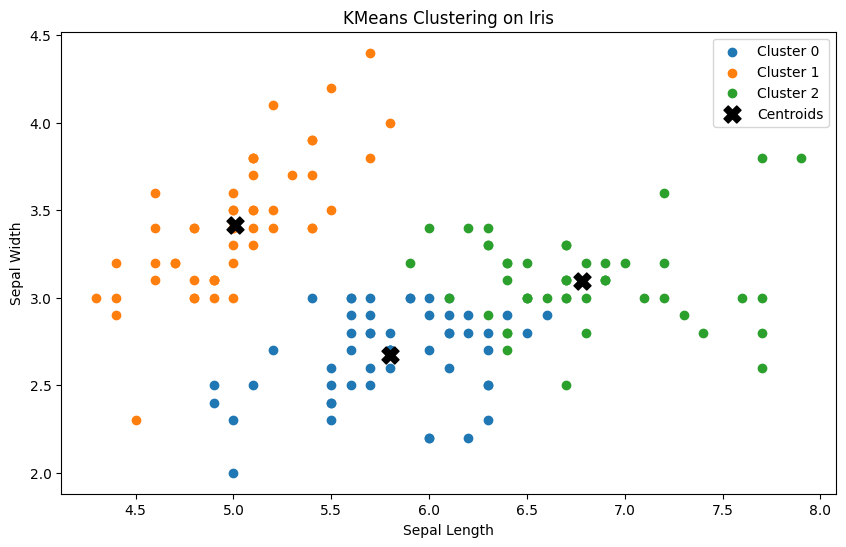

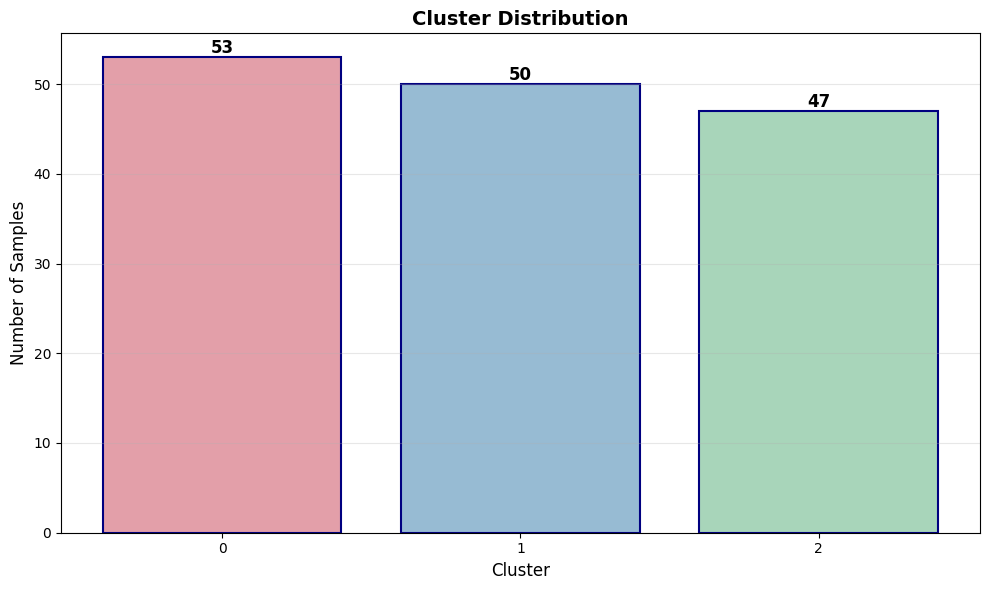

Cluster 0: 53 samples
Cluster 1: 50 samples
Cluster 2: 47 samples


In [10]:
print("\n" + "="*60)
print("VISUALIZATION")
print("="*60)

plt.figure(figsize=(10,6))

for i in range(3):
    subset = df[df["cluster"] == i]
    plt.scatter(subset["sepal_length"], subset["sepal_width"],
                label=f"Cluster {i}")

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1],
            color="black", marker="X", s=150, label="Centroids")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KMeans Clustering on Iris")
plt.legend()
plt.show()

cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, 
                color=['#e39fa9', '#97bbd3', '#a8d5ba'], 
                edgecolor='navy', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Cluster Distribution', fontsize=14, fontweight='bold')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} samples")